In [4]:
!pip install nilearn
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
from sklearn.preprocessing import StandardScaler
import nibabel as nib
# from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 42) # this needs to be modified for some tasks
print('%i regions found in this atlas' % (len(np.unique(atlas_nii.get_data().ravel())) - 1))
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] # gives subject age on standard units after z-scoring

############## note no bootstrap, just taking the first 80% of 100 subjects, that is the first 80 subjects as training set ############

train_input = input_variables[:80]
train_output = output_variable[:80]

test_input = input_variables[80:]
test_output = output_variable[80:]

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


788 regions found in this atlas


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[-0.187882360114632, 0.32280339830491256, 0.30582937564502966, 0.32038347797808986, 0.33881018678482144, 0.2738545287019911, 0.2575727471940382, 0.2597870216052519, 0.28968873211198887, 0.33852970468079924]


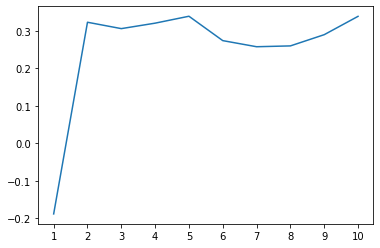

In [6]:
def plot_each_n_neigh(i):
# Logmodel = LogisticRegression(penalty='l2',C=1.0).fit(train_input,train_output)
  KNN = KNeighborsRegressor(n_neighbors=i).fit(train_input,train_output)
  # L2_model = SGDRegressor(penalty='l2', alpha=0.05).fit(train_input,train_output)
  # log_predict_output = Logmodel.predict(test_input)
  KNN_predict_output = KNN.predict(test_input)
  # L2_predict_output = L2_model.predict(test_input)
  # log_accuracy = np.sum(log_predict_output == test_output)/len(test_output)
  KNN_accuracy = r2_score(test_output, KNN_predict_output)
  # L2_accuracy = r2_score(test_output, L2_predict_output)

  return i, KNN_accuracy #L2_accuracy

x_list = [] ### n_rois
# log_y_list = [] ### accuracy
KNN_y_list = []

for i in range (1,11):
  i, KNN_accuracy = plot_each_n_neigh(i)

  # print("i: ", i,"accuracy: ", accuracy)
  x_list.append(i)
  # log_y_list.append(log_accuracy)
  KNN_y_list.append(KNN_accuracy)

print(x_list)
# print(log_y_list)
print(KNN_y_list)
plt.xticks(x_list)
# plt.plot(x_list,log_y_list,label='LogReg')
plt.plot(x_list,KNN_y_list)